smile string length of polymer

correlation between normal metric and extraplated metric

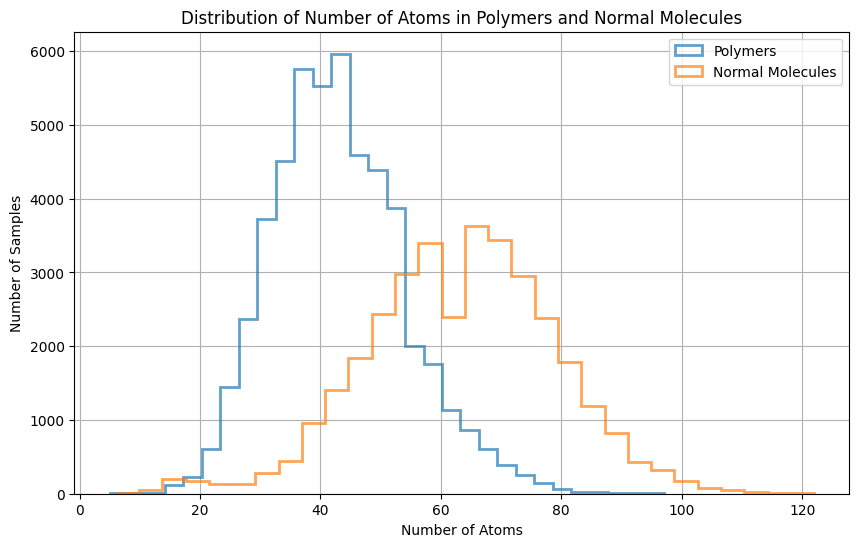

In [2]:
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt


# Load the CSV file
df = pd.read_csv('../datasets/opv3d/raw/train.csv')

# Function to count the number of atoms in a SMILE string
def count_atoms(smile):
    try:
        mol = Chem.MolFromSmiles(smile)
        return mol.GetNumAtoms() if mol else 0
    except:
        return 0

# Apply the atom counting function
df['num_atoms'] = df['smile'].apply(count_atoms)

# Identify rows with extrapolated metrics
polymer_rows = df.dropna(subset=['homo_extrapolated', 'lumo_extrapolated', 'gap_extrapolated', 'optical_lumo_extrapolated']).index

# Separate the number of atoms for polymers and normal molecules
polymer_num_atoms = df.loc[polymer_rows, 'num_atoms']
normal_molecule_num_atoms = df.loc[~df.index.isin(polymer_rows), 'num_atoms']

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.hist(polymer_num_atoms, bins=30, alpha=0.7, label='Polymers', histtype='step', linewidth=2, density=False)
plt.hist(normal_molecule_num_atoms, bins=30, alpha=0.7, label='Normal Molecules', histtype='step', linewidth=2, density=False)

plt.xlabel('Number of Atoms')
plt.ylabel('Number of Samples')
plt.title('Distribution of Number of Atoms in Polymers and Normal Molecules')
plt.legend()
plt.grid(True)
plt.show()

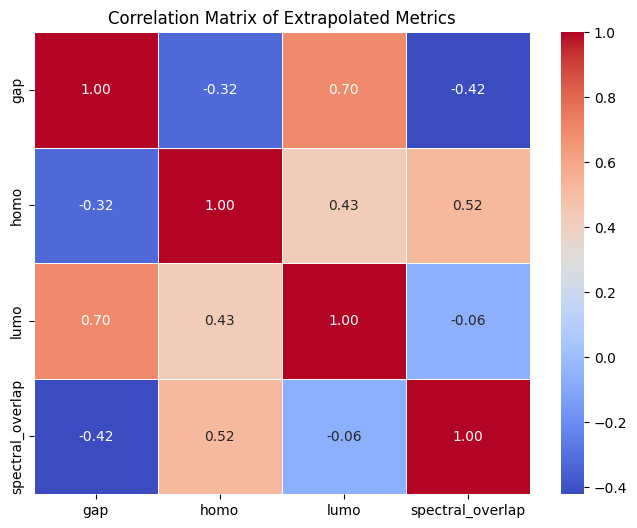

In [4]:
import seaborn as sns

# Select the relevant columns
metrics = ['gap', 'homo', 'lumo', 'spectral_overlap']

# Calculate the correlation matrix
correlation_matrix = df[metrics].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Extrapolated Metrics')
plt.show()

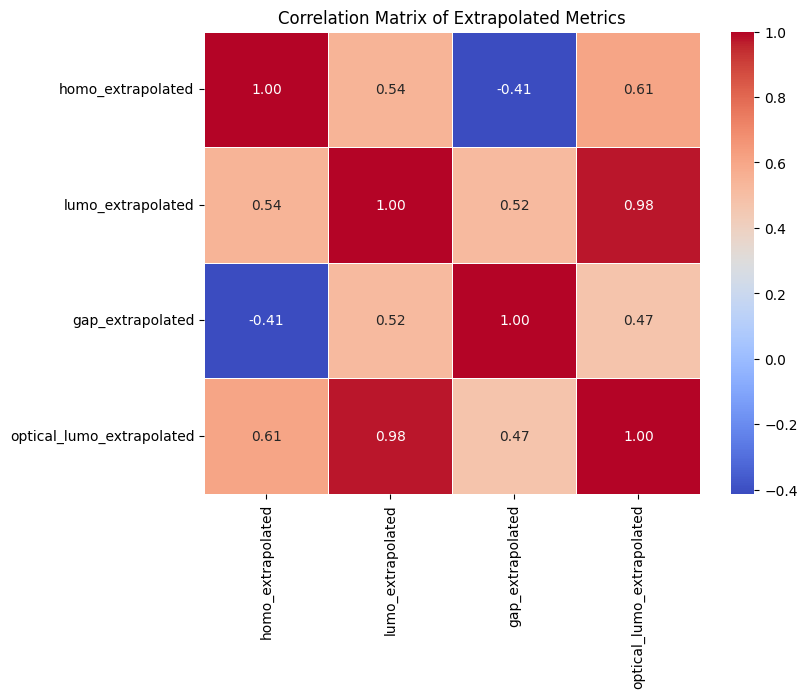

In [3]:
import seaborn as sns

# Drop rows where any of the extrapolated metrics are missing
df_clean = df.dropna(subset=['homo_extrapolated', 'lumo_extrapolated', 'gap_extrapolated', 'optical_lumo_extrapolated'])

# Select the relevant columns
metrics = ['homo_extrapolated', 'lumo_extrapolated', 'gap_extrapolated', 'optical_lumo_extrapolated']

# Calculate the correlation matrix
correlation_matrix = df_clean[metrics].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Extrapolated Metrics')
plt.show()


REPORT:
- Data
Polymer. Polymer data is just different (extrapolated) metric and smaller train set compare to other metric
I am also researching new dataset. The one with 2D Graph Only without MD Sim to get uff comformer to predict ab inito property. 

- Model
Train geometric model such as egnn, equiformer, nequip first before inputing node level invariant feature i.e energy distribution into 2d graph message passing. This approach require Very high complexity. The hyperparameter nearest neighbor / radial distance, hidden feature. doesn improve much on when try to reduce the complexity . 

I tried an approach of creating graph that include edge as both chemical bond and neigbor where neighbor without chemical bond have a unique encoding than other bond type. However, this make hyperedge  

there are literature on fusion between geometric and 2D chemical graph need reviewing




I looked deeper into the approach of node-level invariant features (e.g., energy distributions) from geometric models, such as EGNN, Equiformer, and NequIP, as input to 2D graph message-passing network. This approach, however, entails very high computational complexity i.e double the number of parameters, triple the training time. Tuning hyperparameters like the number of nearest neighbors, radial distance, or hidden feature dimensions to reduce complexity however affect performance badly. 


I also experimented with creating a graph that encodes edges as both chemical bonds and neighboring relationships, where neighbors without chemical bonds are assigned a unique encoding from other bond types. However, to ensure effective learning in geometric graphs, the number of nearest neighbors had to be set quite high (e.g., >16). This resulted in a receptive field that already exceeded the scale of hyperedges derived solely from chemical structures.

There is some literature about the combination of geometric and 2D chemical graphs, often treating them as distinct modalities with fusion methods in the pipeline to improve performance.

The Polymer partition in OPV train dataset is filtered based on the presence of extrapolated property metrics, and its samples are actually not larger. Those molecules likely represent just single units within a chain and are, in fact, generally smaller than other samples. As all samples in the normal test and validation sets for OPV also include extrapolated properties, the Polymer model is effectively just trained on a smaller dataset compared to models for other metrics.

I am also exploring other molecules datasets composed of 2D graph-only data, excluding MD simulations, to predict ab initio properties using UFF conformers.